=== PARÁMETROS DE ENTRADA ===
Masa del K0      = 497.671 MeV/c^2
Masa del Lambda0 = 1115.63 MeV/c^2
Masa del protón  = 938.27231 MeV/c^2
Masa del pión    = 139.56755 MeV/c^2
Número de eventos = 10000

Ejemplos de los primeros eventos simulados:
Lambda -> E1'=943.64 MeV, E2'=171.99 MeV, p'=100.51 MeV/c
Lambda -> E1'=943.64 MeV, E2'=171.99 MeV, p'=100.51 MeV/c
K0 -> E1'=248.84 MeV, E2'=248.84 MeV, p'=206.01 MeV/c
K0 -> E1'=248.84 MeV, E2'=248.84 MeV, p'=206.01 MeV/c
Lambda -> E1'=943.64 MeV, E2'=171.99 MeV, p'=100.51 MeV/c

Ejemplo de dirección: θ = 9.34°, φ = 21.94°

Ejemplo de transformación de Lorentz:
E1_lab = 1948.30 MeV, E2_lab = 323.38 MeV
p1_x_lab = 1704.60, p2_x_lab = 274.27

Ejemplo de datos con smearing aplicado:
E1_obs = 1920.82 MeV, E2_obs = 316.86 MeV
p1_obs = 1676.06 MeV/c, p2_obs = 284.47 MeV/c

Ángulo entre los productos: θ12 = 23.25°

Masa invariante reconstruida = 1044.65 MeV/c²


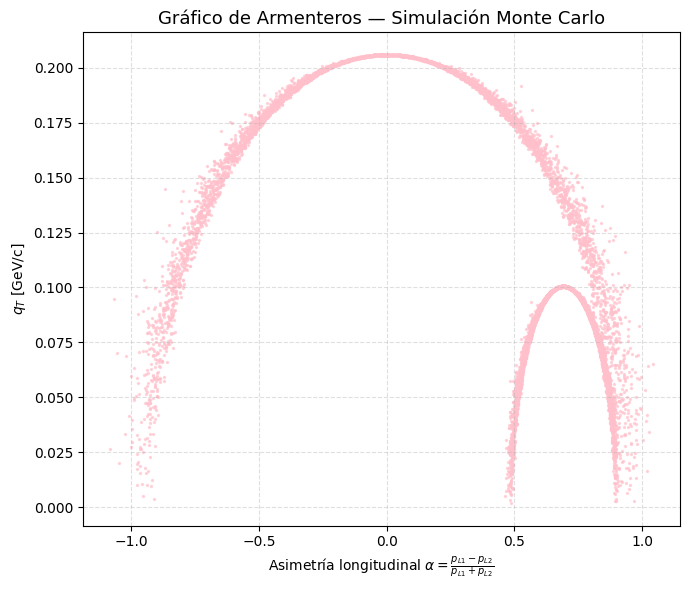


✅ Gráfico de Armenteros generado correctamente y guardado como 'Armenteros_final.png'


In [ ]:
# ===============================================================
# Simulación Monte Carlo: Decaimientos de K0 y Lambda0
# ===============================================================
# En este programa voy a simular el decaimiento de partículas extrañas K0 y Λ0
# usando el método de Monte Carlo. La idea es generar muchos eventos,
# aplicar transformaciones de Lorentz, y al final obtener el gráfico de Armenteros.

import numpy as np
import matplotlib.pyplot as plt
import random

# -------------------------------
# 1. Defino las masas (en MeV/c^2)
# -------------------------------
mK0      = 497.671     # masa del kaón neutro
mLambda  = 1115.63     # masa del lambda neutro
mProton  = 938.27231   # masa del protón
mPion    = 139.56755   # masa del pión cargado

# -------------------------------
# 2. Parámetros iniciales
# -------------------------------
Neventos = 10000        # número total de eventos que voy a simular
c = 3e8                 # velocidad de la luz (por si se necesita)

print("=== PARÁMETROS DE ENTRADA ===")
print(f"Masa del K0      = {mK0} MeV/c^2")
print(f"Masa del Lambda0 = {mLambda} MeV/c^2")
print(f"Masa del protón  = {mProton} MeV/c^2")
print(f"Masa del pión    = {mPion} MeV/c^2")
print(f"Número de eventos = {Neventos}")

# ===============================================================
# Etapa 2–6: Selección del proceso, energía y sistema de reposo
# ===============================================================

# Paso 2: elijo al azar qué partícula decae
# 50% de las veces será K0 -> π+ + π−
# 50% de las veces será Λ0 -> p + π−

Mmadre, m1_hija, m2_hija = [], [], []
tipo_evento = []

for i in range(Neventos):
    azar = random.random()  # número aleatorio entre 0 y 1

    if azar < 0.5:          # mitad de los eventos: K0
        Mmadre.append(mK0)
        m1_hija.append(mPion)
        m2_hija.append(mPion)
        tipo_evento.append("K0")
    else:                   # mitad restante: Lambda0
        Mmadre.append(mLambda)
        m1_hija.append(mProton)
        m2_hija.append(mPion)
        tipo_evento.append("Lambda")

# Paso 3: asigno energía a la partícula madre
# Uso una distribución gaussiana centrada en 2M con sigma = 0.2M
E_madre = np.random.normal(2*np.array(Mmadre), 0.2*np.array(Mmadre))

# Paso 4: calculo su momento relativista
p_madre = np.sqrt(E_madre**2 - np.array(Mmadre)**2)

# Paso 5: factores de Lorentz
gamma = E_madre / np.array(Mmadre)
beta  = p_madre / E_madre

# Paso 6: energías y momentos de las partículas hijas en el sistema en reposo
E1p = (np.array(Mmadre)**2 + np.array(m1_hija)**2 - np.array(m2_hija)**2) / (2*np.array(Mmadre))
E2p = (np.array(Mmadre)**2 + np.array(m2_hija)**2 - np.array(m1_hija)**2) / (2*np.array(Mmadre))
p_mod = np.sqrt(E1p**2 - np.array(m1_hija)**2)

print("\nEjemplos de los primeros eventos simulados:")
for i in range(5):
    print(f"{tipo_evento[i]} -> E1'={E1p[i]:.2f} MeV, E2'={E2p[i]:.2f} MeV, p'={p_mod[i]:.2f} MeV/c")

# ===============================================================
# Paso 7: Elección aleatoria de direcciones (isotropía)
# ===============================================================
# En el sistema de reposo, las partículas decaen en direcciones aleatorias.

def direcciones_aleatorias(N):
    """Genero N direcciones aleatorias (uniformes en la esfera)"""
    theta = np.arccos(2*np.random.rand(N) - 1)
    phi = 2*np.pi*np.random.rand(N)
    ux = np.sin(theta) * np.cos(phi)
    uy = np.sin(theta) * np.sin(phi)
    uz = np.cos(theta)
    return ux, uy, uz

# Direcciones de la primera partícula (la segunda va en sentido opuesto)
ux1, uy1, uz1 = direcciones_aleatorias(Neventos)
ux2, uy2, uz2 = -ux1, -uy1, -uz1

# Componentes del momento en el sistema de reposo
px1p, py1p, pz1p = p_mod * ux1, p_mod * uy1, p_mod * uz1
px2p, py2p, pz2p = -px1p, -py1p, -pz1p

print(f"\nEjemplo de dirección: θ = {np.degrees(np.arccos(uz1[0])):.2f}°, φ = {np.degrees(np.arctan2(uy1[0], ux1[0])):.2f}°")

# ===============================================================
# Paso 8: Transformación de Lorentz (al sistema del laboratorio)
# ===============================================================

E1_lab = gamma * (E1p + beta * px1p)
E2_lab = gamma * (E2p + beta * px2p)
px1_lab = gamma * (px1p + beta * E1p)
px2_lab = gamma * (px2p + beta * E2p)
py1_lab, py2_lab = py1p, py2p
pz1_lab, pz2_lab = pz1p, pz2p

print("\nEjemplo de transformación de Lorentz:")
print(f"E1_lab = {E1_lab[0]:.2f} MeV, E2_lab = {E2_lab[0]:.2f} MeV")
print(f"p1_x_lab = {px1_lab[0]:.2f}, p2_x_lab = {px2_lab[0]:.2f}")

# ===============================================================
# Paso 9–11: Smearing e incertidumbres del detector
# ===============================================================

# Simulo el efecto de la resolución experimental (10%)
E1_obs = np.random.normal(E1_lab, 0.1*np.abs(E1_lab))
E2_obs = np.random.normal(E2_lab, 0.1*np.abs(E2_lab))

theta1_lab = np.arctan2(np.sqrt(py1_lab**2 + pz1_lab**2), px1_lab)
theta2_lab = np.arctan2(np.sqrt(py2_lab**2 + pz2_lab**2), px2_lab)
phi1_lab = np.arctan2(pz1_lab, py1_lab)
phi2_lab = np.arctan2(pz2_lab, py2_lab)

theta1_obs = np.random.normal(theta1_lab, 0.1*np.abs(theta1_lab))
theta2_obs = np.random.normal(theta2_lab, 0.1*np.abs(theta2_lab))
phi1_obs   = np.random.normal(phi1_lab, 0.1*np.abs(phi1_lab))
phi2_obs   = np.random.normal(phi2_lab, 0.1*np.abs(phi2_lab))

# Magnitud del momento reconstruido
p1_obs = np.sqrt(np.clip(E1_obs**2 - np.array(m1_hija)**2, 0, None))
p2_obs = np.sqrt(np.clip(E2_obs**2 - np.array(m2_hija)**2, 0, None))

print("\nEjemplo de datos con smearing aplicado:")
print(f"E1_obs = {E1_obs[0]:.2f} MeV, E2_obs = {E2_obs[0]:.2f} MeV")
print(f"p1_obs = {p1_obs[0]:.2f} MeV/c, p2_obs = {p2_obs[0]:.2f} MeV/c")

# ===============================================================
# Paso 12–13: Componentes longitudinales, transversales y ángulo
# ===============================================================

p1_par, p2_par = px1_lab, px2_lab
p1_T = np.sqrt(py1_lab**2 + pz1_lab**2)
p2_T = np.sqrt(py2_lab**2 + pz2_lab**2)

p1_vec = np.vstack((px1_lab, py1_lab, pz1_lab)).T
p2_vec = np.vstack((px2_lab, py2_lab, pz2_lab)).T

# Calculo el ángulo entre los productos
dot = np.einsum('ij,ij->i', p1_vec, p2_vec)
mag1 = np.linalg.norm(p1_vec, axis=1)
mag2 = np.linalg.norm(p2_vec, axis=1)
cos_ang = np.clip(dot / (mag1 * mag2 + 1e-12), -1, 1)
theta12 = np.degrees(np.arccos(cos_ang))

print(f"\nÁngulo entre los productos: θ12 = {theta12[0]:.2f}°")

# ===============================================================
# Paso 14: Masa invariante y gráfico de Armenteros
# ===============================================================

p_sum = p1_vec + p2_vec
E_total = E1_obs + E2_obs
p_sqr = np.einsum('ij,ij->i', p_sum, p_sum)
M_reconstruida = np.sqrt(np.abs(E_total**2 - p_sqr))

print(f"\nMasa invariante reconstruida = {M_reconstruida[0]:.2f} MeV/c²")

# ===============================================================
# Paso final: Generar el Plot de Armenteros
# ===============================================================

alpha = (p1_par - p2_par) / (p1_par + p2_par + 1e-12)
qT = 0.5 * (p1_T + p2_T)

plt.figure(figsize=(7,6))
plt.scatter(alpha, qT/1000, s=2, color='pink', alpha=0.6)
plt.xlabel(r"Asimetría longitudinal $\alpha = \frac{p_{L1}-p_{L2}}{p_{L1}+p_{L2}}$")
plt.ylabel(r"$q_T$ [GeV/c]")
plt.title("Gráfico de Armenteros — Simulación Monte Carlo", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("Armenteros_final.png", dpi=300)
plt.show()

print("\n✅ Gráfico de Armenteros generado correctamente y guardado como 'Armenteros_final.png'")
